In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
dataset = make_blobs(n_samples=200, centers=4, n_features=2, cluster_std=1.5, random_state=50)

In [3]:
type(dataset)

tuple

In [4]:
len(dataset[1])

200

In [5]:
points = dataset[0]
points

array([[ -1.15371815,   9.28608987],
       [  1.01188629,  -6.85379429],
       [ -2.28009973,   5.823956  ],
       [ -1.61221254,   8.26520229],
       [ -5.74143926,  -3.67713944],
       [ -2.16143959,  -4.70869647],
       [ -1.73033236,  11.19978868],
       [ -0.69890087,  -5.21616418],
       [ -0.18679327,  -6.38975954],
       [ -6.28616029,  -2.17026594],
       [ -5.10617138,  -2.86192364],
       [ -4.11239658,   9.10246728],
       [ -2.81643007,  -2.31235779],
       [ -3.14622737,   1.62315659],
       [ -5.68632748,  -0.80988341],
       [ -1.98438698,   4.35815063],
       [ -2.86762568,  10.95406344],
       [ -1.19667116,  10.28506587],
       [ -5.1805362 ,  -1.62845665],
       [ -4.76737569,  -1.97691043],
       [ -6.65126986,  -3.47559611],
       [ -2.60583895,   3.46890231],
       [ -4.48200422,  10.59320403],
       [ -1.50081866,  11.13363054],
       [ -2.01025101,   9.74393189],
       [ -1.50073727,   4.11008632],
       [ -3.66504685,   9.20395803],
 

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=4)

In [8]:
kmeans.fit(points)

KMeans(n_clusters=4)

In [9]:
import seaborn as sns
sns.set_style("darkgrid")

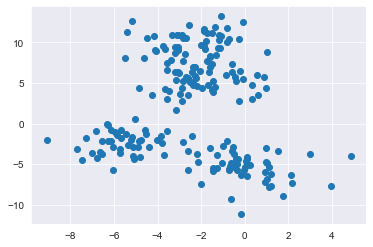

In [10]:
plt.scatter(dataset[0][:,0], dataset[0][:,1])

In [11]:
cluster = kmeans.cluster_centers_
print(cluster)

[[-1.90808931  5.14791029]
 [-5.45922685 -2.35556894]
 [-2.39930521 10.05258314]
 [ 0.06912515 -5.38143605]]


In [12]:
ykm = kmeans.fit_predict(points)
print(ykm)

[0 1 2 0 3 1 0 1 1 3 3 0 3 2 3 2 0 0 3 3 3 2 0 0 0 2 0 1 2 0 0 3 3 1 1 3 3
 3 2 2 0 3 2 2 1 1 0 2 2 0 1 3 2 0 2 2 1 3 3 2 1 1 0 1 1 0 1 2 0 0 1 3 0 1
 2 2 3 2 2 1 3 2 3 3 3 3 0 1 0 3 1 0 1 2 2 3 1 2 1 2 3 1 2 0 2 1 2 3 3 0 1
 3 0 0 3 2 0 0 2 1 0 2 0 0 1 0 0 2 0 1 3 1 1 2 0 2 1 0 0 3 0 2 2 1 3 0 1 2
 1 3 0 3 2 1 1 2 0 1 1 1 2 2 1 1 3 3 3 2 1 1 1 1 3 2 1 0 3 1 0 2 1 2 2 0 3
 1 3 0 2 1 2 2 3 2 1 0 3 2 3 0]


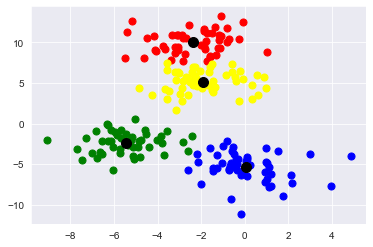

In [13]:
plt.scatter(points[ykm==0, 0], points[ykm==0, 1], s=50, color='red')
plt.scatter(points[ykm==1, 0], points[ykm==1, 1], s=50, color='blue')
plt.scatter(points[ykm==2, 0], points[ykm==2, 1], s=50, color='yellow')
plt.scatter(points[ykm==3, 0], points[ykm==3, 1], s=50, color='green')

for center in cluster:
    plt.scatter(center[0], center[1], s=100, color='black')

In [14]:
k_Range = range(1,10)
sse =[]

for k in k_Range:
    km = KMeans(n_clusters=k)
    km.fit(points)
    sse.append(km.inertia_)
print(sse)

[9031.938855519911, 2405.7748291886114, 1416.9398266625979, 819.4679215223124, 705.1717960898491, 628.0605747054649, 557.4685414379858, 490.25967655893896, 436.9381161852181]


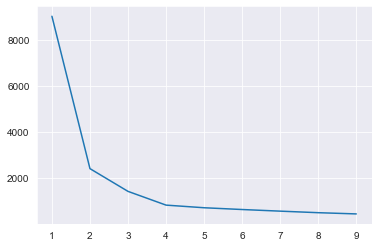

In [15]:
plt.plot(k_Range,sse)

In [20]:
import antpodGIS as apg
import geopandas as gpd
import rasterio as rio
import rasterstats

geo = "FarmKanchi.geojson"
tiff = "S:\\antpodGIS\\tiff\\APX00000-XX-L2A-VXX-2020-01-06.tif"

geodf = apg.retGeoDF(geo, status=True)

datasetReader = rio.open(tiff)
windowRaster, clipGeoData = apg.retClipGeoData(datasetReader, geodf, 1)
transform = apg.retTransform(datasetReader, windowRaster)
stats = rasterstats.zonal_stats(geodf.geometry, clipGeoData,
                            nodata=-999, affine=transform)
i=0
for stat in stats:
    try:
        geodf.loc[i, 'ndvi'] = stat['mean']
    except Exception as e:
        print(str(e))
    i=i+1

Creating grids ... successful
Finishing overlay process ... successful


In [21]:
geodf.head()

,id,geometry,ndvi
0,1,"POLYGON ((80.06210 12.81309, 80.06210 12.81279...",0.586341
1,1,"POLYGON ((80.06160 12.81279, 80.06210 12.81279...",0.658985
2,1,"POLYGON ((80.06160 12.81229, 80.06210 12.81229...",0.719659
3,1,"POLYGON ((80.06160 12.81179, 80.06210 12.81179...",0.769298
4,1,"POLYGON ((80.06160 12.81129, 80.06210 12.81129...",0.763692


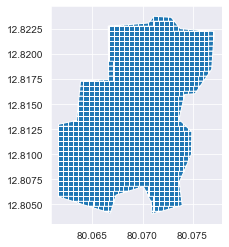

In [22]:
geodf.plot()

In [ ]:
coordinates = [feature['geometry']['coordinates'] for feature in data['features']]

In [30]:
kmeans2 = KMeans(n_clusters=4)

km4 = kmeans2.fit(geodf.geometry)

TypeError: float() argument must be a string or a number, not 'Polygon'

In [23]:
cluster = kmeans2.cluster_centers_
ykm = kmeans2.fit_predict(geodf.ndvi)

ValueError: Expected 2D array, got 1D array instead:
array=[0.5863414  0.65898531 0.71965867 0.76929806 0.76369198 0.68981449
 0.62732903 0.64199082 0.66469114 0.57632452 0.45168444 0.61567991
 0.50210438 0.26290212 0.19347022 0.19468609 0.58917571 0.57731969
 0.65961338 0.75195785 0.72767092 0.67313409 0.57044535 0.36754615
 0.5923845  0.56228494 0.30090449 0.54081192 0.53917481 0.25483953
 0.16679324 0.20908326        nan 0.66243873 0.66998169 0.70293712
 0.70995374 0.7068093  0.71850617 0.65275982 0.36095709 0.49869455
 0.46506037 0.47606077 0.45222384 0.32570768 0.18805275 0.12342985
 0.19551215        nan        nan 0.58066585 0.53726002 0.60202438
 0.60118639 0.6736557  0.68683778 0.7334517  0.74605894 0.56327911
 0.50812845 0.40668469 0.46403919 0.38255357 0.38991356 0.27153831
 0.37618317 0.23657944 0.11605488 0.20461155 0.52798528        nan
 0.59653866 0.55811827 0.53374896 0.63016605 0.65260979 0.65411162
 0.47545498 0.53271793 0.52648299 0.56606327 0.64174883 0.66557999
 0.74359915 0.38870617 0.32452685 0.35980244 0.41155173 0.32051424
 0.26309401 0.14370903 0.18500768 0.21182506 0.21970127 0.26318031
 0.48882973        nan 0.59093916 0.61247294 0.6174021  0.71282247
 0.68998713 0.44092026 0.5430926  0.38226125 0.24845891 0.22432658
 0.4381527  0.47041977 0.5201523  0.34069175 0.29655227 0.48751877
 0.32971159 0.1971362  0.13443856 0.25798279 0.21988412 0.13297255
 0.16840005 0.27405437 0.42866311 0.67556182 0.3148367  0.52533702
 0.67624744 0.71097456 0.64274426 0.65168553 0.66847558 0.44635318
 0.35251212 0.22649116 0.30441685 0.37165256 0.34639221 0.43755202
 0.3379402  0.32681811 0.35842276 0.18165295 0.12514351 0.22532867
 0.22331201 0.12673911 0.1137037  0.19319692 0.32509277 0.48134695
 0.66955838 0.55179258 0.66468906 0.69984574 0.69506471 0.68403688
 0.6652264  0.65356413 0.47531734 0.33288221 0.33570682 0.2775555
 0.25824185 0.22448213 0.46039171 0.33391457 0.38615877 0.44020528
 0.35060136 0.30639207 0.35091287 0.30531125 0.19875947 0.18769041
 0.33987174 0.25367024 0.37807988 0.63616212 0.44654847 0.42889046
 0.5563613  0.65743246 0.60591619 0.6901128  0.66497378 0.38219826
 0.21886985 0.2699927  0.2132737  0.24571102 0.29849044 0.31164356
 0.19721645 0.2774409  0.38036583 0.34267911 0.33485571 0.20338154
 0.34561837 0.21408449 0.16277887 0.36435518 0.31916418 0.35984992
        nan 0.69173239 0.64493522 0.70726865 0.75595668        nan
        nan        nan        nan 0.62886243 0.43641507 0.5993737
 0.50317554 0.39644408 0.43161824 0.57189125 0.35849127 0.32890126
 0.28431856 0.22417114 0.25499452 0.23349525 0.25818026 0.23038944
 0.22420893 0.20238318 0.28496957 0.31365684 0.23061044 0.16474514
 0.36380531 0.35121914 0.43756022 0.38136984 0.58578174 0.4594435
 0.22745242        nan 0.50659241 0.49964125 0.55725864 0.60516962
 0.59463312 0.56087475 0.53023976 0.50111475 0.29362102 0.44846381
 0.39335003 0.24302407 0.37087568 0.40356223 0.33651998 0.43346621
 0.4955899  0.43312725 0.34419119 0.34000404 0.18596594 0.16780608
 0.12396229 0.25210201 0.1830321  0.23052292 0.13686996 0.20000848
 0.24666975 0.29177893 0.31330976 0.37134717 0.41727803 0.50369043
 0.45703423 0.66585211 0.62036028 0.30000822 0.67970443 0.56994533
 0.50097444 0.52510034 0.65478151 0.64345719 0.56405894 0.53374021
 0.54898368 0.3482492  0.27937809 0.16461635 0.10459732 0.27580521
 0.36715633 0.37870971 0.42204709 0.43058441 0.42223426 0.24324792
 0.17838569 0.34436903 0.17854587 0.08529742 0.24809194 0.18784575
 0.23940382 0.11818101 0.17944794 0.24518299 0.41015318 0.27860698
 0.43077941 0.58518727 0.70870848 0.53099807 0.62596186 0.63099147
 0.48686699 0.44743515 0.61976104 0.56008491 0.57651577 0.59932843
 0.67622724 0.6887927  0.50449729 0.27333591 0.10683344 0.20777109
 0.12322708 0.16004327 0.29410269 0.44914506 0.39565223 0.30069324
 0.29039621 0.18924595 0.31414446 0.16117843 0.13544918 0.00987463
 0.07058535 0.27234849 0.46784738 0.25532679 0.25262164 0.45266373
 0.50883867 0.45569375 0.14931408 0.41239646 0.63152982 0.38231975
 0.3998162  0.53638448 0.5093887  0.47098907 0.49682131 0.63422717
 0.58053205 0.51099996 0.41785731 0.33352957 0.35197098 0.54982867
 0.35586201 0.36281835 0.38960859 0.30659913 0.20195209 0.21041435
 0.24099968 0.44969558 0.42697631 0.18485268 0.02309494 0.02438744
 0.2275656  0.24595308 0.15727504 0.35678439 0.58067778 0.60745032
 0.58704076 0.46607077 0.35641768 0.46025902 0.30074389 0.34299192
 0.37979969 0.30556407 0.35073208 0.36006252 0.38896548 0.40031619
 0.48896528 0.55084457 0.5422584  0.44391365 0.60093583 0.46570381
 0.27453697 0.32608622 0.3391954  0.13811224 0.14472769 0.2562582
 0.45344661 0.42960352 0.18324023 0.07230742 0.17266456 0.30409457
 0.2435946  0.30741827 0.34485285 0.37979924 0.28225556 0.6789497
 0.70679751 0.31925008 0.23135497 0.21348871 0.29547683 0.26491246
 0.29024089 0.45068974 0.50564876 0.33323492 0.32186704 0.37990107
 0.60929618 0.57338613 0.49768795 0.54111938 0.28538093 0.23970638
 0.24497091 0.30277522 0.17694938 0.32827794 0.20086209 0.38456938
 0.17236207 0.08108372 0.31799909 0.41400075 0.44860642 0.71664233
 0.67990635 0.6271067  0.59307557 0.5847642  0.58491064 0.2473533
 0.18083962 0.16355133 0.15513189 0.28598055 0.3680712  0.30768806
 0.55082766 0.52697822 0.42810904 0.36726451 0.38138698 0.46991065
 0.38200949 0.37645179 0.40682353 0.25652804 0.30892983 0.16523966
 0.31864203 0.42523204 0.35675467 0.38282354 0.34602865 0.26912728
 0.47629491 0.37085458 0.42148769 0.44374497 0.49672249 0.53780329
 0.46113381 0.49658836 0.53437402 0.2631267  0.29178131 0.26387005
 0.26023777 0.38142816 0.41442392 0.44724363 0.60404228 0.46986748
 0.35292409 0.40729066 0.31597237 0.37823249 0.32293985 0.33956735
 0.37133789 0.22001095 0.24066143 0.24530758 0.30780783 0.20664194
 0.20336038 0.315353   0.38245663 0.23401848 0.4079579  0.61663671
 0.62205395 0.5664921  0.49107564 0.53072372 0.50026272 0.59809442
 0.5330064  0.5507189         nan 0.49068551 0.45481307 0.36971918
 0.42782345 0.45423431 0.51406872 0.45277028 0.55547245 0.61675424
 0.40994414 0.29755243 0.3627253  0.33718784 0.32858541 0.28498493
 0.29307191 0.212854   0.16437415 0.1233581  0.16590119 0.28603816
 0.23530885 0.22029109 0.41607094 0.35702605 0.24453374 0.25449189
 0.71772029 0.69828961 0.68621218 0.64971361 0.53346111 0.50496658
 0.64359882 0.52488475 0.52511348 0.48557886 0.52250395 0.44080441
 0.13270326 0.45056722 0.33583764 0.30289585 0.32792821 0.40857676
 0.45160246 0.44035342 0.41447809 0.48406031 0.31175196 0.24509149
 0.4509048  0.4570999  0.25940235 0.65691816 0.44172125 0.1367383
 0.22157101 0.26261487 0.34258461 0.46413925 0.5435801  0.19220421
 0.44778948 0.31130259 0.2350239  0.52875802 0.51673856 0.4384214
 0.33793881 0.45752344 0.42474814 0.33830821 0.34638853 0.43932882
 0.45695106 0.44614549 0.50215443 0.52719764 0.2981717  0.45131253
 0.48375671 0.41165411 0.4136682  0.34069179 0.33234543 0.45301373
 0.24280592 0.21745529 0.24080531 0.23521028 0.51320065 0.39415484
 0.20121066 0.41635596 0.48258441 0.31238874 0.2282177  0.22871247
 0.30344476 0.39524097 0.33220522 0.26089128 0.30318104 0.34464825
 0.27049729 0.48412433 0.41485543 0.3486376  0.41084808 0.43589758
 0.24060645 0.40991688 0.51774419 0.40248997 0.31328252 0.27319464
 0.31778776 0.54685572 0.47675676 0.46182117 0.55299343 0.51690389
 0.39900541 0.22273151 0.26667334 0.44704025 0.26988202 0.19091807
 0.25639814 0.40839261 0.52711188 0.44696704 0.23648063 0.39180642
 0.55377773 0.35139113 0.23333523 0.25980954 0.25107666 0.34173957
 0.36126415 0.45655927 0.5299546  0.46456698 0.27442841 0.3860135
 0.39272699 0.40234049 0.53421068 0.53683862 0.40443451 0.50597062
 0.54101481 0.36822395 0.29907452 0.24270043 0.27396567 0.39090732
 0.44324761 0.51058031 0.32725747 0.25168671 0.19957609 0.2626718
 0.27577212 0.27396064 0.28130997 0.36561062 0.3485917  0.44155323
 0.60549077 0.36003932 0.24134634 0.42516622 0.27688883 0.23216461
 0.26137593 0.20332879 0.25117572 0.5331491  0.55970001 0.6655836
 0.52001486 0.36774336 0.54782657 0.69547689 0.61732027 0.58758692
 0.57343404 0.48761047 0.36054522 0.46989128 0.5706865  0.47921329
 0.35555064 0.6974789  0.52384588 0.45233845 0.40223733 0.37594134
 0.21479058 0.22235173 0.24161384 0.37911823 0.39645602 0.23546598
 0.29369455 0.36112562 0.31850048 0.59725818 0.55823738 0.44709376
 0.35482831 0.317388   0.4660747  0.44978929 0.42184046 0.3849548
 0.39003232 0.58625199 0.71293132 0.70887756 0.74109824 0.68099551
 0.68857202 0.52119935 0.49125807 0.59303321 0.41970477 0.4031436
 0.43801187 0.475914   0.51828538 0.52374522 0.58062056 0.50270938
 0.41385823 0.24363297 0.28079853 0.22889466 0.29046148 0.39096633
 0.39297259 0.25958755 0.26923861 0.36363763 0.61674077 0.60119603
 0.43703299 0.39047193 0.42008065 0.64973595 0.54595753 0.52839366
 0.39876266 0.50694017 0.50023335 0.69774179 0.65660703 0.66218724
 0.66179408 0.66562156 0.67558149 0.45239026 0.60702855 0.56412879
 0.59529397 0.49587465 0.48211459 0.52511724 0.58012668 0.39182378
        nan 0.43340114 0.45924507 0.25645941 0.25783934 0.23998453
 0.45265252 0.38571864 0.22184353 0.22551582 0.40943772 0.61361145
 0.6288399  0.52185056 0.5218394  0.72986579 0.44964656 0.32598191
 0.59609854 0.70821138 0.63271985 0.68050807 0.65425606 0.59155081
 0.50737824 0.55099272        nan 0.41045242 0.35759498 0.27115513
 0.23874686 0.32015235 0.34436586 0.26486468 0.15768671 0.19073955
 0.57155234 0.49744565 0.57297009 0.5761932  0.61564908 0.31819753
 0.52423894 0.7025695  0.63606152 0.6848522  0.57064801 0.60163461
 0.29310971 0.44665187 0.3876087  0.32629783 0.3379758  0.22004633
 0.2418589  0.30997135 0.47157849 0.61334293 0.48949855 0.55251451
 0.52088324 0.55311757 0.41681383 0.44323442 0.45820816 0.39968839
 0.29921985 0.26364513 0.46266549 0.34322803 0.56990335 0.62693425
 0.50975866 0.42581845 0.31845134 0.2180724  0.3888647  0.40520763
 0.46252609 0.39827856 0.31640646 0.35142929 0.29499451 0.46551613
 0.48135413 0.47724634        nan 0.396846   0.4633534  0.50026787
 0.38151878 0.31393716 0.32098219 0.31053361 0.40861788 0.425852
        nan        nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
k_Range = range(1,10)
sse =[]

for k in k_Range:
    km = KMeans(n_clusters=k)
    km.fit(points)
    sse.append(km.inertia_)
print(sse)
plt.plot(k_Range,sse)